# Modernizing Credit Risk Modelling
## Using machine learning to challenge industry norms

<br/>

![alt text](https://miro.medium.com/max/1500/1*c_fiB-YgbnMl6nntYGBMHQ.jpeg "Title")
Image citation: buffaloboy “Machine learning banner, artificial intelligence, Machine learning and Deep learning flat line vector banner with icons on blue background” Shutterstock, Royalty-free stock vector ID: 1098841148
<br/>

<br/>

### University of Regina - CS 890ES - Data Science Fundamentals - Term Project - Winter 2020
#### Adam Kehler (kehler2a@uregina.ca, SN 200251114)

**About the author:**
I am a PhD student in the Math & Stats department at the University of Regina with a focus on computational statistics. Given my focus, I find certain computer science courses extremely relevant and beneficial in developing the skills I need to excel in my research - this Data Science Fundamentals course being a prime example. Beyond my academic world, I am the director of a modelling and data science team at Farm Credit Canada (FCC). I have been with the organization for about 9 years in various roles ranging from market analytics, to operational research, to financial analyst, to pension manager, to my current role as director. These roles might seem very different, but they all leveraged the analytical capabilities I developed with my actuarial science and statistics background. My current job allows me the unique opportunity to help solve a business problem at my organization  for this CS 890ES Term Project.  


---------------------------------------------------------------------------------------------------------------------------
<br/>

## 1. Problem Statement

My objective is to use modern data science and machine learning techniques to benchmark, challenge, refine, and enhance the more traditional statistical modelling methods employed currently at my organization for processes related to certain accounting standards and banking regulations.

<br/>

## 2. Introduction and Background

### 2.1 Accounting standards and banking regulations

Financial institutions are subject to various standards and regulations. In Canada, prominent examples include the International Financial Reporting Standards (IFRS) issued by the International Accounting Standards Board (IASB), and the regulatory guidelines issued by Canada’s Office of the Superintendent of Financial Institutions (OSFI). More specifically, as it relates to Canadian banks, OSFI issues the Capital Adequacy Requirements (CAR) guidelines domestically which are designed to adhere to the relevant parts of the Basel Framework – which is a full set of international standards prepared by the Basel Committee on Banking Supervision (BCBS). 

My organization is required to comply with IFRS and is asked to align our practices with OSFI CAR guidelines.


### 2.2 Adoption of machine learning techniques

For banks to adhere to these standards and regulations, considerable efforts are required from a data and modelling perspective. As a result of the importance and scrutiny put on these processes, the data and modelling techniques generally need to be transparent, defensible, auditable, and reliable. This has led to a more moderate adoption rate of modern data science and machine learning approaches within the industry. This point is showcased in a recent Financial Post article: ["What's in the black box? Rise of artificial intelligence in banking presents challenge for OSFI" ](https://business.financialpost.com/news/fp-street/whats-in-the-black-box-rise-of-artificial-intelligence-in-banking-presents-challenge-for-osfi)

As a stepping stone these more modern techniques are starting to emerge as ways to benchmark, challenge, refine, and enhance more traditional techniques that are more commonly accepted within the standards and regulatory regime.

My perspective would be that my organization is no exception to the more moderate adoption trend.


### 2.3 Business use and application

Within my organization there is a group called Model Governance Committee (MGC), which is comprised of certain members of senior management (i.e. Vice-Presidents). Among their responsibilities is: 1) approving models for use within the business and 2) reviewing model performance on an on-going basis. In addition, there are other committees in the organization that receive outputs from the models to help them make decisions. These committees require a certain level of assurance that the models are developed, maintained, and performing well. To aid in this we have model development guidelines that we follow, as well as process for model performance monitoring. Within this, it is often important to have alternative models that are used to help benchmark, challenge, and understand the implemented model. There is an opportunity to use non-traditional statistical models as these alternatives to improve the assurance we are able to provide senior management. Overtime, the company's comfort with these non-traditional approaches will grow and they can become more mainstream.
<br/>

### 2.4 Objective

Therefore, my objective is to use **modern data science and machine learning techniques** to benchmark, **challenge**, refine, and enhance one of the more **traditional statistical methods** employed at my organization for **accounting or regulatory purposes**.

More specifically, the Loss Given Default (LGD) model used for calculating the Expected Credit Losses (ECL) for accounting purposes.

<br/>

## 3. Solution Overview

### 3.1 Scope

The model that I believe would make a particularly good candidate for exploring machine learnings alternatives to compare against the more traditional statistical approaches being used is an LGD Model. It forms part of the Allowance for Credit Loss (ACL) calculations as per the IFRS 9 accounting standard for determining expected credit losses in a loan portfolio.

**Note - change in scope from proposal -** When initially drafting the project proposal I decided to specify the LGD model, as well as the PD Term Structure model. Since then, work has been identified at my organization in regards to the LGD model. Given this is higher priority than the PD Term Structure, and that a key criteria of this CS890ES Term Project is to solve a business problem, I am opting to expand my scope on the LGD model in place of the PD Term Structure model. In addition, I found that there was much more to "play around" with related to the LGD model than first anticipated.

### 3.2 Current LGD Model
The model is used to determine the loss that is expected to occur conditional on the loan having defaulted. This involves looking back at the losses incurred by historical loans that have defaulted. The objective is to find characteristics about a defaulted loan or situation that is predictive of the expected losses given the default occurs.  

The current model follows a two-stage micro-structure model that decomposes LGD into two independent components - the Probability of Write-off given Default (PWOD) and the Expected Loss given Write-off (ELWO). That is, the PWOD represents the probability that a loan that has defaulted will end up being written-off (i.e. it does not recover) and the ELWO represents the expected severity of the loss given a write-off occurs. The relationship between LGD, PWOD, and ELWO is summarized by:
$$E(LGD)=E(PWOD\times ELWO)=E(PWOD)\times E(ELWO).$$

Where $E(\cdot)$ is the notation for the expected value of the random variable within the parentheses. The above formula relies on the assumption that PWOD and ELWO are independent random variables - this allows us to make the assertion that the expected value of the product is equal to the product of the expected values. This is a simplifying assumption that is generally accepted in the industry for the purpose of modelling expected credit losses.

The models for PWOD and ELWO are both based on common scorecard approaches that are built using logistic regression. For PWOD this is a natural fit since we are interested in the binary outcome of "write-off" or "no write-off". For ELWO, the outcome is theoretically a continuous number between 0 and 1 (i.e. no loss to total loss). Logistic regression is still leveraged in this case using industry standard transformations on the input data.

### 3.3 Proposed approaches
There are multiple machine learning techniques that might be appropriate for LGD modelling (Tiziano Bellini, IFRS 9 and CECL Credit Risk Modelling and Validation: A Practical Guide with Examples Worked in R and SAS, 2019). To some extent, which techniques are appropriate depends on whether the two-stage microstructure approach is retained from the current LGD Model or if the preference is to model LGD directly in one-step. Within the two-stage approach, a classification method will be needed for the first step and something capable of regressing for a continous output will be needed for the second step. Whereas the one-step approach would need to go directly to a continuous output approach. The following approaches will be explored:
1. Two-step models
    1. Random Forest classification with Random Forest regression
    2. Random Forest classification with K-Nearest Neighbors regression

    Note - The 1st step and 2nd step models will be combined using two different approaches (this will be described later when executing the analysis).

2. One-step models
    1. Random Forest regression
    2. K-Nearest Neighbors regression
    3. Neural Network (multi-layer perceptron) regression
    4. Simulation based model*

    *This is an extension of scoping in an LGD simulation model, described later.

### 3.4 Compare Performance
Recall that the objective of this project is to use modern data science and machine learning techniques to benchmark, challenge, refine, and enhance the more traditional statistical modelling methods. As such, of prime importance to me is how the alterative approaches described earlier perform compared to the current approach. Performance in this context refers to model fit, accuracy, predictability, etc., as opposed to run-time performance.

Performance will be assessed by comparing the current and alternative models against actual data to determine which most accurately predicts LGD rates. The performance comparison will be made on the test data after the models have been built on separate training data. The key performance measures will be Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Mean Arctan Absolute Percentage Error (MAAPE).

<br/>

## 4. Data, Modelling, & Analysis
This section summarizes the data and the analysis (i.e. model development and performance assessments).

### 4.1 LGD Data

The first step is to import our data. The observed LGD data from 2002 to 2012 was readily available from a previous iteration of LGD model development. This data set will be used for this analysis to facilitate performance comparisons against the original model. The data file I was originally provided had 7,264 defaults with 172 columns of various information related to each default event. This equates to approx. 1.25 million pieces of information related to default events. However, due to data quality, as well as relevance of the information, I narrowed this down to 21 columns of information (for approx. 150,000 pieces of information related to default events). For propriatary reasons, the raw data can't be shared within this project. However, summary statistics for some of the data will be provided below to help understand the data.

The data was originally extracted from systems such as SAP, Oracle databases, Teradata databases, and Excel spreadsheets, combined using SQL in SAS. Due to system access limitations, this data was put into CSV format to be uploaded into this Python Jupyter Notebook using pandas.

In [5]:
import pandas as pd
import numpy as np

data = pd.read_excel (r'C:\Users\kehlera\OneDrive - FCC-FAC\PMDS\LGD_Data.xlsx', dtype={'ELGD': np.float32,
                                                                                        'LEVERAGE_RATIO': np.float32,
                                                                                       'LOAN_TO_SEC_RATIO': np.float32,
                                                                                       'EAD': np.float32, 'EQ_PER': np.float32,
                                                                                       'RE_QT_PER': np.float32,
                                                                                       'DEBT_SERV_COV_RATIO': np.float32,
                                                                                       'TOT_PRIORS_PER_SEC': np.float32,
                                                                                       'PWOD_PERCENTAGE': np.float32,
                                                                                       'ELWO_PERCENTAGE': np.float32,
                                                                                       'Model_LGD': np.float32})
data.describe(include='all')

,Key,WO,ELGD,LEVERAGE_RATIO,BAL_SHEET_TYPE,CUSTOMER_LOCATION,SEC_CATEGORY,LOAN_TO_SEC_RATIO,LTV_Group,RISK_SCORE,...,EQ_PER,RE_QT_PER,LGD_ENTCODE,LOANPURPOSE50,DEBT_SERV_COV_RATIO,TOT_PRIORS_PER_SEC,DEFAULT_CAL_YEAR,PWOD_PERCENTAGE,ELWO_PERCENTAGE,Model_LGD
count,7264.00000,7264.000000,7264.000000,7264.000000,7264.000000,7261,7264,7264.000000,7264,7264.000000,...,7264.000000,7264.000000,7264,7264,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000,7264.000000
unique,NaN,NaN,NaN,NaN,NaN,19,2,NaN,4,NaN,...,NaN,NaN,10,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,SK,RPL,NaN,Less than 0.5,NaN,...,NaN,NaN,Crops,Equipment,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2125,4191,NaN,3270,NaN,...,NaN,NaN,3089,2134,NaN,NaN,NaN,NaN,NaN,NaN
mean,3631.50000,0.175661,0.083540,8.683309,2.232379,NaN,NaN,0.548372,NaN,665.871971,...,0.405239,0.545339,NaN,NaN,31.484711,0.173321,2006.517070,0.175881,0.433257,0.091305
std,2097.08051,0.380558,0.247421,25.738470,1.585063,NaN,NaN,0.360633,NaN,93.404548,...,0.471273,0.478553,NaN,NaN,45.216560,1.901213,2.259128,0.169237,0.189180,0.119236
min,0.00000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,-0.012000,NaN,402.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,2003.000000,0.025000,0.100000,0.002500
25%,1815.75000,0.000000,0.000000,0.430000,2.000000,NaN,NaN,0.317000,NaN,596.000000,...,0.000000,0.000000,NaN,NaN,1.040000,0.000000,2005.000000,0.050000,0.200000,0.020000
50%,3631.50000,0.000000,0.000000,0.820000,2.000000,NaN,NaN,0.536000,NaN,670.000000,...,0.000000,0.856550,NaN,NaN,1.580000,0.000000,2006.000000,0.100000,0.500000,0.050000
75%,5447.25000,0.000000,0.000000,1.770000,2.000000,NaN,NaN,0.716000,NaN,739.000000,...,1.000000,1.000000,NaN,NaN,100.000000,0.085700,2008.000000,0.150000,0.500000,0.097500


NOTE: Some of the column headings are self-explanatory, however, others are a bit more cryptic. Rather than define each variable at this point, I will define them as I go if they end up being used.

#### 4.1.1 Observed LGD Distribution
One variable I will mention right from the start is the column called "ELGD", which stands for "Experienced Loss Given Default". That is, it represents the observed LGDs from 2002 to 2012. I will use ELGD, LGD, and observed LGD interchangeably. This will act as the key variable that ultimately requires predicting. Before diving into the modelling, I think it is useful to look at this variable and its distribution.

From the dataframe description table above, we know the mean of LGD is 0.08354. This implies that, on average, if a loan defaults we can expect to lose 8.354% of the value of the remaining loan balance. The standard deviation is approximately 3-times the mean. Given this variability, it is worth exploring the whole distribution to see if the mean is an accurate representation of the variable.

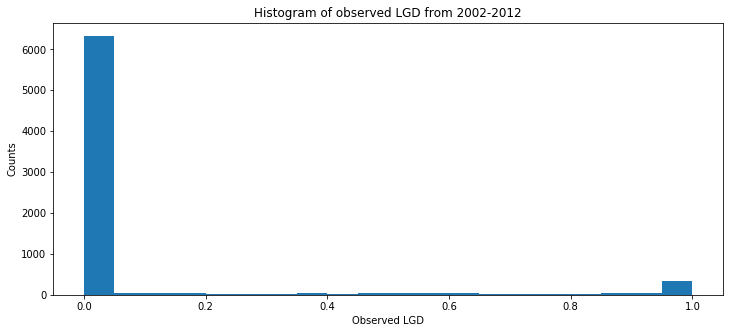

In [6]:
import matplotlib.pyplot as plt

LGD = round(data['ELGD'],2)
num_bins = 20
fig, ax = plt.subplots(1, 1, figsize = (12,5))

ax.hist(LGD, bins=num_bins)
ax.set_xlabel('Observed LGD')
ax.set_ylabel('Counts')
ax.set_title(r'Histogram of observed LGD from 2002-2012')
plt.show()

As you can see, the mass of the observed LGD falls right near 0, with a fairly uniformly small representation between 0.05 and 0.95, and a small mass near 1. From the dataframe description table above, it shows that the 75th percentile for ELGD is 0. In fact, we can use the "percentileofscore" function from scipy stats to see what portion of the observed LGD are approximately 0. Based on the output of the code below, 85% of the LGDs are less than 0.01%. Given this, I don't feel the mean of 8.354% is very representative. In reality, this is due to most LGDs being 0 (or almost 0) and a small mass near 1 pulling the mean away from 0. This bimodal behavior makes LGD notoriously difficult to model.

In [7]:
from scipy import stats

print(round(stats.percentileofscore(LGD,0.0001),0))

85.0


#### 4.1.2 LGD and Loan-to-Value (LTV)
Intuition (and experience) tells us that if a loan is secured using collateral, the risk of losses should be mitigated. This is because, in the event of default, the security can often be sold to help repay the loan. Extending this intuition, loans with more collateral should mitigate this risk more than loans with less collateral (all else being equal). A common ratio in the industry for measuring this is "loan-to-value" or LTV. This is the value of the loan divided by the value of the asset that is securing the loan. 

Given the type of lending my organization tends to do, our loans typically have "good" LTVs. That said, there is certainly variability in the LTVs of each loan depending on the purpose of the loan and many other factors that weigh into our customer's financing needs.

Splitting the data set into 4-categories of varying levels of LTVs helps to further illustrate the bimodal pattern described above. The code below groups the LGDs into 4 groups based on the following LTV ranges: Unsecured (LTV above 1.45), High (LTV between 0.8 to 1.45), Normal (LTV between 0.5 to 0.8), and Low (LTV less than 0.5). These ranges are in part created based on business reasons (i.e. 80% is a specific policy number) and in part from exploring the data.

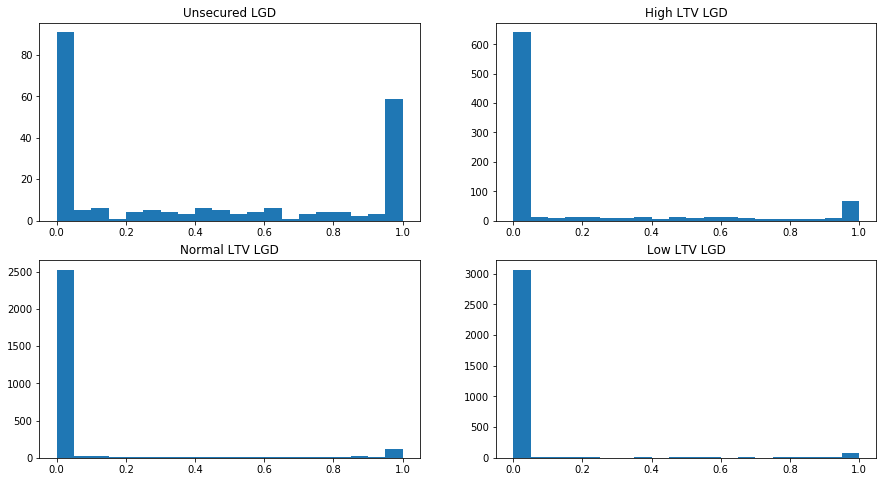

Mean LGD:
Unsecured LGD = 0.41
High LTV LGD = 0.16
Normal LTV LGD = 0.08
Low LTV LGD = 0.04


In [8]:
import statistics as s

Unsecured_LTV = round(data['ELGD'][data.LTV_Group.eq('Above 1.45')],2)
High_LTV = round(data['ELGD'][data.LTV_Group.eq('0.8 to 1.45')],2)
Normal_LTV = round(data['ELGD'][data.LTV_Group.eq('0.5 to 0.8')],2)
Low_LTV = round(data['ELGD'][data.LTV_Group.eq('Less than 0.5')],2)

fig, axs = plt.subplots(2, 2, figsize = (15,8))

axs[0][0].hist(Unsecured_LTV, bins=num_bins)
axs[0][1].hist(High_LTV, bins=num_bins)
axs[1][0].hist(Normal_LTV, bins=num_bins)
axs[1][1].hist(Low_LTV, bins=num_bins)
axs[0][0].set_title(r'Unsecured LGD')
axs[0][1].set_title(r'High LTV LGD')
axs[1][0].set_title(r'Normal LTV LGD')
axs[1][1].set_title(r'Low LTV LGD')
plt.show()

print('Mean LGD:')
print('Unsecured LGD =',round(s.mean(Unsecured_LTV),2))
print('High LTV LGD =',round(s.mean(High_LTV),2))
print('Normal LTV LGD =',round(s.mean(Normal_LTV),2))
print('Low LTV LGD =',round(s.mean(Low_LTV),2))

Comparing the 4 histograms above, it is clear that the bimodal pattern exists for each group, but is more pronounced for the high LTV and Unsecured group. The list of means for each group also highlights how much more the mass near 1 pulls the mean away from the mass near 0 for the High LTV and Unsecured group. It should also be noticeable from the y-axis marks that there are less counts of default incidents as we move into the High LTV and Unsecured groups. This is because those high LTVs are quite a bit more rare within our typical portfolio.

This relationship between LTV and LGD will be kept top-of-mind while moving through the rest of the analysis. LTV will be included as a key variable and other variables will be brought in to see if a sufficiently explanatory model can be developed.

### 4.2 Random LGD Generator
Not initially in scope of this project but useful nonetheless is a random LGD generator that captures the relationships described above. This is useful when running portfolio simuations to understand the tail risk associated with the portfolio. My organization doesn't currently have a model for this, so I am choosing to scope it in to this project. It will be used to enhance our abilities to simulate a portfolio loss distribution used in a key risk process at the organization.

A common approach in the industry is to fit a Beta distribution to the data and generate Beta random variables to represent simulted LGDs. Given the bimodal nature of our LGD model described above, I am opting for a more customized / algorithmic approach that will better capture the likelihood of seeing LGDs equal to 0 AND 1.

#### 4.2.1 Random LGD Algorithm
The "algorithm" for the generator will be as follows:
1. Generate an LTV ratio for many "fake" loans (in this case, the same number as there were loans in the original data set, for camparison purposes). For comparison purposes, I will also force the number loans in each LTV group to be the same as the original data. Note - In application this would be applied to a known portfolio of loans, so this first simuation step would not be needed.
2. Set an upper and lower threshold probability for each LTV group.
    1. The lower threshold will be the proportion of loans in the lowest bin (of 20).
    2. The upper threshold will be 1 minus the proportion of loans in the highest bin (of 20).
3. Randomly generated a uniform(0,1) variable for each loan.
4. For each loan, compare that uniform(0,1) random variable to the thresholds for its respectively LTV group.
    1. If it is below the lower threshold, set the simulated LGD as the min LGD value (defined as 1%).
    2. If above the upper threshold, consider it a "total loss" (i.e. set the LGD to 100%).
    3. If it is between the thresholds, generate a uniform(1%,100%) random variable to be the LGD.

#### 4.2.2 The Random LGD Generator Code
The code below operationalizes the algorthim above. After generating many simulated LGDs, I will compare back against the original distributions to see how they compare.

In [9]:
# Random LGD generator

import numpy as np
np.random.seed(12345)
n = len(LGD)
Grouping_rands = np.random.uniform(0, 1, n)
Perc_unsecured = len(Unsecured_LTV) / len(LGD)
Perc_high = len(High_LTV) / len(LGD)
Perc_normal = len(Normal_LTV) / len(LGD)
Perc_low = len(Low_LTV) / len(LGD)

Count_unsecured = int(round(n * Perc_unsecured,0))
Count_high = int(round(n * Perc_high,0))
Count_normal = int(round(n * Perc_normal,0))
Count_low = int(n - (Count_unsecured + Count_high + Count_normal))

Temp1 = np.append(np.random.uniform(1.45,99,Count_unsecured), np.random.uniform(0.80,1.45,Count_high))
Temp2 = np.append(np.random.uniform(0.50,0.80,Count_normal), np.random.uniform(0,0.50,Count_low))
LTVs = np.append(Temp1, Temp2)

Min_LGD = .01  # Setting minimum LGD as 1% based on discounting the recovery value (i.e. time-value of money)

Unsecured_threshold_low = axs[0][0].hist(Unsecured_LTV, bins=num_bins)[0][0] / len(Unsecured_LTV)
Unsecured_threshold_high = 1 - axs[0][0].hist(Unsecured_LTV, bins=num_bins)[0][-1] / len(Unsecured_LTV)
High_threshold_low = axs[0][0].hist(High_LTV, bins=num_bins)[0][0] / len(High_LTV)
High_threshold_high = 1 - axs[0][0].hist(High_LTV, bins=num_bins)[0][-1] / len(High_LTV)
Normal_threshold_low = axs[0][0].hist(Normal_LTV, bins=num_bins)[0][0] / len(Normal_LTV)
Normal_threshold_high = 1 - axs[0][0].hist(Normal_LTV, bins=num_bins)[0][-1] / len(Normal_LTV)
Low_threshold_low = axs[0][0].hist(Low_LTV, bins=num_bins)[0][0] / len(Low_LTV)
Low_threshold_high = 1 - axs[0][0].hist(Low_LTV, bins=num_bins)[0][-1] / len(Low_LTV)

LGDs = np.zeros(n)
for i in range(len(LTVs)):
    if LTVs[i] >= 1.45:
        if Grouping_rands[i] < Unsecured_threshold_low:
            LGDs[i] = Min_LGD
        elif Grouping_rands[i] > Unsecured_threshold_high:
            LGDs[i] = 1
        else: LGDs[i] = np.random.uniform(Min_LGD,1,1)
    elif 0.8 <= LTVs[i] < 1.45:
        if Grouping_rands[i] < High_threshold_low:
            LGDs[i] = Min_LGD
        elif Grouping_rands[i] > High_threshold_high:
            LGDs[i] = 1
        else: LGDs[i] = np.random.uniform(Min_LGD,1,1)
    elif 0.5 <= LTVs[i] < 0.8:
        if Grouping_rands[i] < Normal_threshold_low:
            LGDs[i] = Min_LGD
        elif Grouping_rands[i] > Normal_threshold_high:
            LGDs[i] = 1
        else: LGDs[i] = np.random.uniform(Min_LGD,1,1)
    else:
        if Grouping_rands[i] < Low_threshold_low:
            LGDs[i] = Min_LGD
        elif Grouping_rands[i] > Low_threshold_high:
            LGDs[i] = 1
        else: LGDs[i] = np.random.uniform(Min_LGD,1,1)

#### 4.2.3 Comparing simulated LGDs to original LGDs
The following section uses histograms and certain statistical measures to compared the simulated LGDs (from the LGD generator) to the original LGD data.

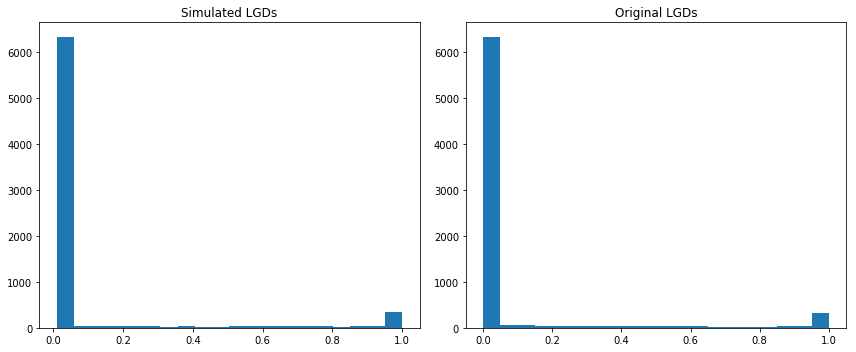

In [11]:
# Overall histogram of simulated LGDs compared to original LGDs

fig, axs1 = plt.subplots(1, 2, tight_layout=True, figsize = (12,5))

axs1[0].hist(LGDs, bins=num_bins)
axs1[1].hist(LGD, bins=num_bins)
axs1[0].set_title(r'Simulated LGDs')
axs1[1].set_title(r'Original LGDs')

plt.show()

From the visual above, the aggregate comparison looks appropriate. Let's also verify that it looks appropriate for each of the four LTV groups.

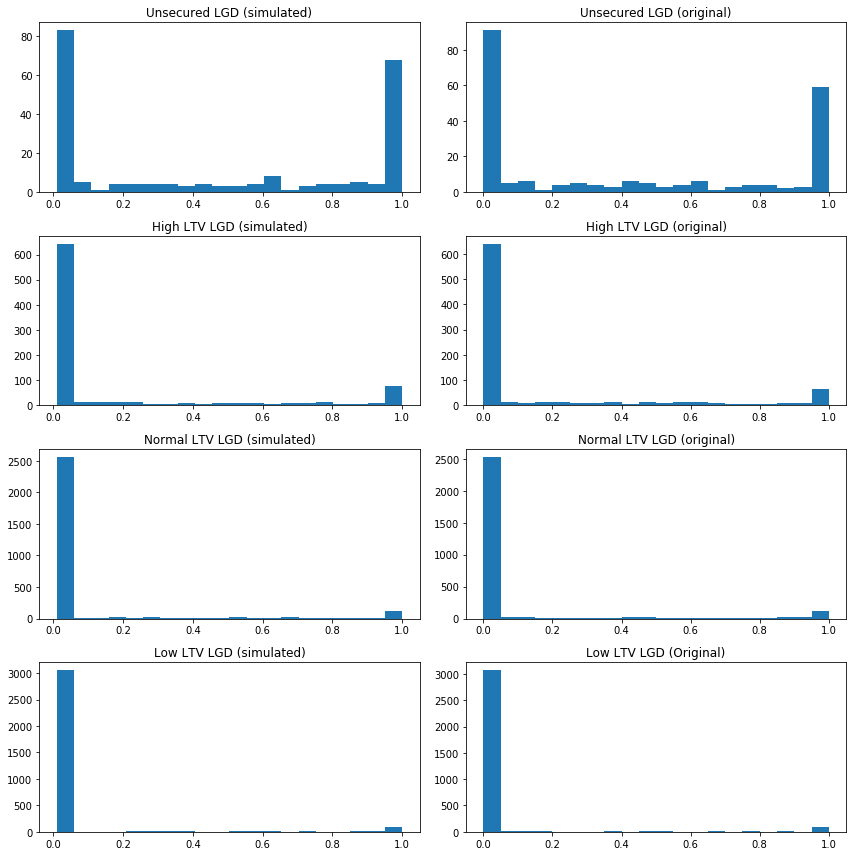

Compare means for simulated LGDs to original data:
Unsecured LGD (simulated) = 0.47 , compared to original: 0.41
High LTV LGD (simulated) = 0.18 , compared to original: 0.16
Normal LTV LGD (simulated) = 0.09 , compared to original: 0.08
Low LTV LGD (simulated) = 0.06 , compared to original: 0.04


In [31]:
# Histograms comparing simulated LGDs to original LGDs for each of the LTV groups

Unsecured_LGDs = [LGDs[i] for i in range(len(LGDs)) if LTVs[i]>=1.45]
High_LGDs = [LGDs[i] for i in range(len(LGDs)) if 0.8 <= LTVs[i] < 1.45]
Normal_LGDs = [LGDs[i] for i in range(len(LGDs)) if 0.5 <= LTVs[i] < 0.8]
Low_LGDs = [LGDs[i] for i in range(len(LGDs)) if 0 <= LTVs[i] < 0.5]

fig, axs2 = plt.subplots(4, 2, tight_layout=True, figsize = (12,12))

axs2[0][0].hist(Unsecured_LGDs, bins=num_bins)
axs2[0][1].hist(Unsecured_LTV, bins=num_bins)
axs2[1][0].hist(High_LGDs, bins=num_bins)
axs2[1][1].hist(High_LTV, bins=num_bins)
axs2[2][0].hist(Normal_LGDs, bins=num_bins)
axs2[2][1].hist(Normal_LTV, bins=num_bins)
axs2[3][0].hist(Low_LGDs, bins=num_bins)
axs2[3][1].hist(Low_LTV, bins=num_bins)
axs2[0][0].set_title(r'Unsecured LGD (simulated)')
axs2[0][1].set_title(r'Unsecured LGD (original)')
axs2[1][0].set_title(r'High LTV LGD (simulated)')
axs2[1][1].set_title(r'High LTV LGD (original)')
axs2[2][0].set_title(r'Normal LTV LGD (simulated)')
axs2[2][1].set_title(r'Normal LTV LGD (original)')
axs2[3][0].set_title(r'Low LTV LGD (simulated)')
axs2[3][1].set_title(r'Low LTV LGD (Original)')
plt.show()

print('Compare means for simulated LGDs to original data:')
print('Unsecured LGD (simulated) =',round(s.mean(Unsecured_LGDs),2),', compared to original:',round(s.mean(Unsecured_LTV),2))
print('High LTV LGD (simulated) =',round(s.mean(High_LGDs),2),', compared to original:',round(s.mean(High_LTV),2))
print('Normal LTV LGD (simulated) =',round(s.mean(Normal_LGDs),2),', compared to original:',round(s.mean(Normal_LTV),2))
print('Low LTV LGD (simulated) =',round(s.mean(Low_LGDs),2),', compared to original:',round(s.mean(Low_LTV),2))


Comparing the simulated distributions for each LTV group to the original looks good as well. At least visually, which is sufficient for our purposes at this point.
<br/>

#### 4.2.4 Portfolio-level versus loan-level
It is important to note that these comparisons are being done on the distribution and not at the individual loan level. For example, if we were to run the LGD simulation on the original loans and then compare the simulated LGD to the actual LGD (as opposed to generating our own set of simulated loans), we would find the results likely not that accurate at the loan-level (we will test this later though). The simulated amount would be close some times, lower others, and higher other times yet - but on average would come out pretty close. There are certain analyses and exercises we do that only require us to be accurate at the group or portfolio level, but not at the loan-level. This simulation approach is appropriate for those situations.

Other times, however, loan-level accuracy is quite important. We could either extend the simulation technique above to try to do this or try other techniques. I will move forward and try other techniques.

<br/>


### 4.3 Two-step LGD Model
Another benefit to having thought through the LGD simulation is that it highlights the importance of a model being able to sufficiently discriminate between a) no loss (i.e. LGD ~= 0), b) full loss (i.e. LGD ~= 1), or c) something in between. This is a key reason that the current LGD model in production at my organization uses a two-step approach. It first models the likelihood of a binary outcome (0 - no loss or 1 - some amount of loss). Then, it models the expected severity of the loss given that some loss amount happens (i.e. first step is a 1). It then makes the assumption that the likelihood and severity are independent random variables, and therefore can accurately be jointly represented by their product.

#### 4.3.1 Step-1 of two-step model
Before attempting to model it in one-step with machine learning techniques, I want to also try a two-step approach. However, rather than a binary first step, I want a trinary first-step: 0 - no loss, 1 - partial loss, 2 - full loss. The step-two conditional expected loss could then be calculated a couple ways: 1)probability weighted average for partial loss and full loss; or 2) a separate value / function applied to each category resulting from step 1.

**Data preparation -**
Defined this way, the scikit-learn Random Forest algorithm can be used for our multi-class classification. But first, I need to prepare the data for the Random Forest algorith. Preparing the data includes:
* Converting categorical data to dummary variables
* Handling missing values (in this case, making them '0')
* Creating an "LGD group" where 0 is LGDs near 0, 2 is LDGs near 1, and 1 is all other values
* Splitting the data into a training and testing set (in this case, 70% training and 30% testing)
* Scaling or standardizing the features - not necessarily needed for Random Forest, but will be needed later.

In [ ]:
# Prepare date for step-1 Random Forest Classification

ddata = pd.get_dummies(data) # convert catagorical data to dummary variables
ddata.fillna(0)
ddata = ddata.drop(['PWOD_PERCENTAGE', 'ELWO_PERCENTAGE', 'Model_LGD'], axis=1)
LGD = ddata['ELGD']

LGD_group = np.zeros(len(LGD))

for i in range(len(LGD)):
    if LGD[i] <= 0.05:
        LGD_group[i] = 0
    elif LGD[i] >= 0.95:
        LGD_group[i] = 2
    else: LGD_group[i] = 1

LGD_group = pd.DataFrame({'LGD_group': LGD_group})
ddata = ddata.join(LGD_group)

X = ddata.iloc[ : , 2:-1]
y = ddata.iloc[ : , -1]

# Use 70/30 train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

y_1_train = X_train.iloc[:,0][y_train == 1]
y_1_test = X_test.iloc[:,0][y_test == 1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training -** Now that the data is ready, I can train the model.

In [124]:
# Train Random Forest Classification model

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

classifier = RandomForestClassifier(n_estimators = 100, random_state = 16)
classifier.fit(X_train[:,1:], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=16, verbose=0, warm_start=False)

**Performance check -** With the first step of the 2-step model now fit, it is worth checking the performance at this interim step. Note that the overall performance of the two-step model will be checked at the end. However, it is good to also be checking performance along the way. Given that we plan to probability weight the second model outputs using the classification probabilities from this step, our output of interest is the "predict_proba" result from the model. Note, these probabilities will also be used to classify each loan.

In [370]:
# Quick performance check on step-1 model

from sklearn.metrics import roc_curve, precision_score, auc, accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(X_test[:,1:])
probs = classifier.predict_proba(X_test[:,1:]) # store classification probabilities for later in Step-2 model

mean_probs = np.mean(probs, axis=0)
mean_probs = [round(x,2) for x in mean_probs]

actual0 = round(len(y_test[y_test==0]) / len(y_test),2)
actual1 = round(len(y_test[y_test==1]) / len(y_test),2)
actual2 = round(len(y_test[y_test==2]) / len(y_test),2)

act_probs = [actual0, actual1, actual2]

print('Actual frequencies of 0,1,2 : ',act_probs)
print('Mean probabilities of 0,1,2 : ',mean_probs)

Actual frequencies of 0,1,2 :  [0.87, 0.08, 0.05]
Mean probabilities of 0,1,2 :  [0.86, 0.09, 0.05]


The two arrays above show the following:
1. Actual frequencies of how often our testing loans are in each category (0 - no loss, 1 - partial loss, 2 - full loss)
2. Average probability across the test loans based on the model. This is read as the average probability of a loan being classified as a 0 is 86%.

The actual frequencies and mean probabilities line-up well on the aggregate. This doesn't guarantee that at the loan level the model does well. This will be tested more closely after the 2nd step of the two-step model is complete. For now, the aggregate result being close is comfort enough to move on.

**Feature importance -**
Also of interest is which of the features are most "important" to our step-1 classification / probability model. The code below shows the top 5 features based on the importance rating that is a built-in output of the Random Forest Classification algorithm that was used.

In [187]:
# Top 5 freature importance for Random Forest Classification model

Model_1_top_features = list(zip(ddata.columns[3: ], classifier.feature_importances_))

feature_list = list(X.iloc[:,1:].columns)
importances = list(classifier.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
print('Top 5 variables by importance:')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance[0:5]];

Top 5 variables by importance:
Variable: RISK_SCORE           Importance: 0.13
Variable: LOAN_TO_SEC_RATIO    Importance: 0.12
Variable: EAD                  Importance: 0.11
Variable: LEVERAGE_RATIO       Importance: 0.09
Variable: DEBT_SERV_COV_RATIO  Importance: 0.07


"RISK_SCORE" is actually the output of an internal model that is used to rate the risk associated with a given customer. It is promising to see that this score is also an important feature in understanding loss severity classification for customers. Intuitively, we would expect higher risk customers to result in high losses in the event of a default (all else being equal). The next is our LTV that was discussed previously and agian, no surprise that this is an important feature. "EAD" is "exposure at default" and represents the absolute size of the exposure (i.e. outstanding loan balance) at time of default. "LEVERAGE_RATIO" is the amount of leverage a customer has taken on (i.e. their overall debt compared to their assets). "DEBT_SERV_COV_RATIO" is a common industry ratio that proxies the ability for a customer to make payments on their debt obligations. All of these features being important is an intuitive result.

<br/>

#### 4.3.2 Step-2 of 2-step model
Now that the step-1 model is complete, I can move on to the 2nd step model. This step is meant to estimate the loss % given that a partial loss (i.e. classification 1) has occurred. To prepare the date, I need to isolate the train and test cases that were in LGD_group = 1 (i.e. experienced a partial loss).

**Random Forest Regression -**
A key difference between this step and the previous is that our output is a continuous variable (as opposed to categorical). Given this, I will first use the Random Forest Regression algorithm rather than the classifier.

To put this step into context, it is worth recalling the proportion of loans that are expected to result in a partial loss. Above we showed that the frequency in the test data set was 8%. Therefore, this 2nd-step model won't play a very large role in the overall predicted LGD. However, any additional accuracy that we can find is welcome.

In [186]:
# Filter train and test data for those only in LGD group 1. Then fit RF Regressor function and display top 5 importance features.

X_1_train = X_train[y_train == 1]
X_1_train = X_1_train[:,1:]
X_1_test = X_test[y_test == 1]
X_1_test = X_1_test[:,1:]

regressor = RandomForestRegressor(n_estimators=1000, random_state = 88)
regressor.fit(X_1_train,y_1_train)

LGD_G1_predict = regressor.predict(X_1_test)

feature_list = list(X.iloc[:,1:].columns)
importances = list(regressor.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
print('Top 5 variables by importance:')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance[0:5]];

Top 5 variables by importance:
Variable: EAD                  Importance: 0.13
Variable: LOAN_TO_SEC_RATIO    Importance: 0.11
Variable: RISK_SCORE           Importance: 0.11
Variable: LEVERAGE_RATIO       Importance: 0.1
Variable: DEBT_SERV_COV_RATIO  Importance: 0.09


Not surprisingly, the same top 5 features show up for the regression as with the classification (ordered slightly differently). Below is a quick calculation of "performance" for step-2 in isolation. 

In [194]:
RF_errors = abs(LGD_G1_predict - y_1_test)
print('Mean Absolute Error:', round(np.mean(RF_errors),2), 'degrees.')
RF_mape = 100 * (RF_errors / y_1_test)
RF_accuracy = np.mean(RF_mape)
print('Mean Absolute Percentage Error: ', round(RF_accuracy,2), '%.')

Mean Absolute Error: 0.23 degrees.
Mean Absolute Percentage Error:  98.72 %.


We will return to this performance after trying another approach to the 2nd-step model.

**k-NN for step 2 LGD model -**
To provide an alternative option, it is worth trying the k nearest neighbors algorithm for the step 2 model as well. This model will rely on the training data to find the nearest neighbors to each of the test cases. 

In [193]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_1_train,y_1_train)

LGD_G1_KNN_predict = KNN.predict(X_1_test)

KNN_errors = abs(LGD_G1_KNN_predict - y_1_test)
print('Mean Absolute Error:', round(np.mean(KNN_errors),2), 'degrees.')
KNN_mape = 100 * (KNN_errors / y_1_test)
KNN_accuracy = np.mean(KNN_mape)
print('Mean Absolute Percentage Error: ', round(KNN_accuracy,2), '%.')

Mean Absolute Error: 0.23 degrees.
Mean Absolute Percentage Error:  90.71 %.


**Benchmark performance for second model -**
The performance of the two approaches (Random Forest and k-NN) for step-2 of the LGD model isn't great. However, recall that the main reason we are doing the two-step approach is because of the large mass near 0 and the smaller mass near 1. The remaining loans, that we antitipate to fall somewhere in the middle (i.e. partial loss), are fewer in number. This will have a smaller impact on overall performance of the model when we bring the two-steps together. Therefore, for the step-2 model, any performance better than random chance or simply taking the mean of that group is a plus. Below this comparison is checked.

In [198]:
np.random.seed(125)
Rand_errors = abs(np.random.uniform(.05,.95,len(y_1_test)) - y_1_test)
Rand_mape = np.mean(100 * (Rand_errors / y_1_test))
Mean_errors = abs(np.mean(y_1_train) - y_1_test)
Mean_mape = np.mean(100 * (Mean_errors / y_1_test))

print('Mean Absolute Error (Random):', round(np.mean(Rand_errors),2), 'degrees.')
print('Mean Absolute Percentage Error (Random): ', round(Rand_mape,2), '%.')
print('Mean Absolute Error (Mean):', round(np.mean(Mean_errors),2), 'degrees.')
print('Mean Absolute Percentage Error (Mean): ', round(Mean_mape,2), '%.')

Mean Absolute Error (Random): 0.32 degrees.
Mean Absolute Percentage Error (Random):  126.38 %.
Mean Absolute Error (Mean): 0.23 degrees.
Mean Absolute Percentage Error (Mean):  101.39 %.


The performance on our step-2 model was better than the performance benchmarks above. Technically, the random one should be run many times to get a sense of how much it varies per random run. However, I wouldn't expect it to be better than the case when we apply the conditional mean. Therefore, we will focus on the "Mean" benchmark (MAE = 0.23, MAPE=101.39%). Of which, both the step-2 models perform better. Since the performance of the two approaches are comparable, I am opting to use the Random Forest Regression ("RF Reg") as it lends well to generalization, intuition for management, and to programing the model into operation (as compared to the k-NN).

#### 4.3.3 Putting the two-steps together

I will put the two-steps together two different ways:
1. If the first-step model (i.e. Random Forest Classification) predicts LGD_Group = 0 (i.e. zero loss), then LGD = 0, if it predicts LGD_Group = 2, then LGD = 1, otherwise use the RF Reg prediction amount (i.e. the step-two model). This will need to be "optimized" by adjusting the cut-off values that determine the classification from the step 1 model.
2. The other approach will be to probability-weight LGD = {0, RF Reg, 1} using the probabilities for LGD_Group = {0,1,2} that comes from the RF Classification step.

#### 1st approach - classify then severity
This could be done automatically using the "Classifier.predict" functionality, for which I set the variable "y_pred" in previous code. However, I want the flexibility to adjust the cut-offs that determine when a loan is classified into state 0, 1, or 2. 

In [268]:
# First approach

cut_off_g2 = 0.4
cut_off_g1 = 0.45

LGD_predict1 = regressor.predict(X_test[:,1:])
y_pred1 = np.zeros(len(y_test))
New_model_LGDs = np.zeros(len(y_test))

for i in range(len(y_test)):
    if probs[i][2] >= cut_off_g2:
        y_pred1[i] = 2
        New_model_LGDs[i] = 1.00
    elif probs[i][1] >= cut_off_g1:
        y_pred1[i] = 1
        New_model_LGDs[i] = round(LGD_predict1[i],4)  
    else: 
        y_pred1[i] = 0
        New_model_LGDs[i] = 0.00    # For performance set to 0, but in application set to min LGD (~1%)

EPSILON = 1e-10
Overall_errors = abs(New_model_LGDs - data['ELGD'][y_test.index])
Overall_maape = np.mean(np.arctan(Overall_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (Challenger1):', round(np.mean(Overall_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Challenger1): ', round(Overall_maape,2), '%.')

Mean Absolute Error (Challenger1): 0.08 degrees.
Mean Arctan Absolute Percentage Error (Challenger1):  0.13 %.


Through manually exploring different cut-off thresholds, the best performance was found to occur when we classify a loan to LGD group 2 (i.e. full loss) if the probability of that classification from our model is at least 40% and classifying it as group 1 (i.e. partial loss) if there is a probability of at least 45% for that loan being in that category. Let's look at the 2nd approach before discussing performance.

#### 2nd approach - probability weighted
This next approach doesn't require that we classify the loan first, it simply uses the probabilities associated with each category to probability weight the outcomes.

In [269]:
# Second approach

LGD_predict2 = regressor.predict(X_test[:,1:])

New2_model_LGDs = [round(np.dot(probs[k], [0,round(LGD_predict2[k],4),1]),4) for k in range(len(probs))]

New2_errors = abs(New2_model_LGDs - data['ELGD'][y_test.index])
New2_maape = np.mean(np.arctan(New2_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (2nd Challenger):', round(np.mean(New2_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (2nd Challenger): ', round(New2_maape,2), '%.')

Mean Absolute Error (2nd Challenger): 0.11 degrees.
Mean Arctan Absolute Percentage Error (2nd Challenger):  1.22 %.


Looking at the Mean Absolute Error and the Mean ArcTan Absolute Percentage Error (since many actual values of LGD are 0 and would create an error with Mean Absolute Percentage Error), the first approach appears to perform better. However, let's also look visually at the results and compare them against the current model in production.

#### Performance (of two-step model) compared to current model

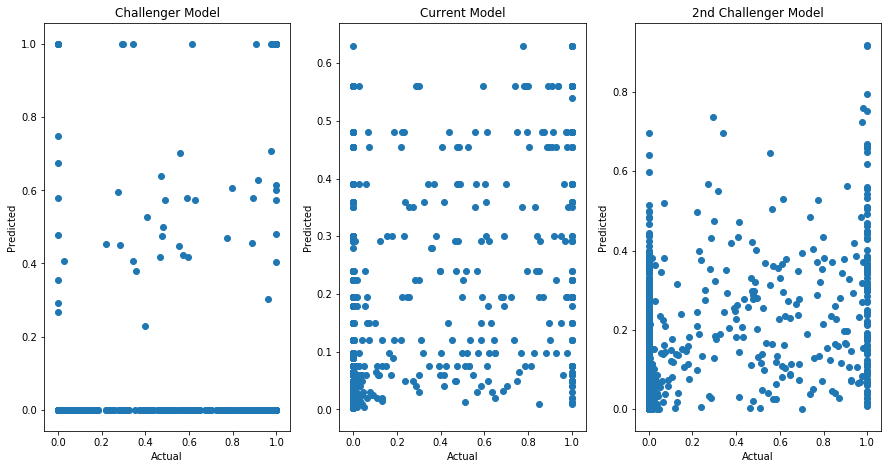

Mean Absolute Error (Challenger): 0.08 degrees.
Mean Arctan Absolute Percentage Error (Challenger):  0.13 %.
Mean Absolute Error (Current): 0.12 degrees.
Mean Arctan Absolute Percentage Error (Current):  1.42 %.
Mean Absolute Error (2nd Challenger): 0.11 degrees.
Mean Arctan Absolute Percentage Error (2nd Challenger):  1.22 %.


In [270]:
# Performance of the above two approaches compared to current model

fig, ax = plt.subplots(1, 3, figsize = (15,7.5))
ax[0].scatter(data['ELGD'][y_test.index], New_model_LGDs)
ax[1].scatter(data['ELGD'][y_test.index], data['Model_LGD'][y_test.index])
ax[2].scatter(data['ELGD'][y_test.index], New2_model_LGDs)
ax[0].set_xlabel(r'Actual')
ax[0].set_ylabel(r'Predicted')
ax[1].set_xlabel(r'Actual')
ax[1].set_ylabel(r'Predicted')
ax[2].set_xlabel(r'Actual')
ax[2].set_ylabel(r'Predicted')
ax[0].set_title(r'Challenger Model')
ax[1].set_title(r'Current Model')
ax[2].set_title(r'2nd Challenger Model')
plt.show()

EPSILON = 1e-10
Overall_errors = abs(New_model_LGDs - data['ELGD'][y_test.index])
Overall_maape = np.mean(np.arctan(Overall_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (Challenger):', round(np.mean(Overall_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Challenger): ', round(Overall_maape,2), '%.')

Current_errors = abs(data['Model_LGD'][y_test.index] - data['ELGD'][y_test.index])
Current_maape = np.mean(np.arctan(Current_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (Current):', round(np.mean(Current_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Current): ', round(Current_maape,2), '%.')

New2_errors = abs(New2_model_LGDs - data['ELGD'][y_test.index])
New2_maape = np.mean(np.arctan(New2_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (2nd Challenger):', round(np.mean(New2_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (2nd Challenger): ', round(New2_maape,2), '%.')

Both challenger approaches lead to an improvement to the model fit / performance. Of the two ways of putting together the two-steps, the first approach (i.e. Challenger Model - that classifies first) performs the best. It seems to get its superior performance from predicting a lot of 0 LGDs and some 1s. Which is what we see in experience, but naturally this will result in predicted 0s when they in fact will have a loss. However, on the aggregate, this error is considerably smaller than the error created by the second approach and the existing model.

### 4.4 One-step LGD Model
The intent was also to attempt the LGD model in one step directly. The following approaches are explored:
1. Random Forest Regression (using scikit learn RandomForestRegressor)
2. K-Nearest Neighbors Regression (using scikit learn KNeighborsRegressor)
3. Neural Network Multi-layer Perceptron Regression (using scikit learn neural_network.MLPRegressor)
4. Simulation based model (adapting the simulation model previously shown)
<br/>


#### 4.4.1 Random Forest one-step model

In [277]:
# 1. Random Forest approach to one-step model

regressor2 = RandomForestRegressor(n_estimators=100, random_state = 87)
regressor2.fit(X_train[:,1:],data['ELGD'][y_train.index])

LGD_RF_predict = regressor2.predict(X_test[:,1:])

feature_list = list(X.iloc[:,1:].columns)
importances2 = list(regressor2.feature_importances_)

feature_importance2 = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances2)]
feature_importance2 = sorted(feature_importance2, key = lambda x: x[1], reverse = True)
print('Top 5 variables by importance:')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance2[0:5]];

Top 5 variables by importance:
Variable: LOAN_TO_SEC_RATIO    Importance: 0.16
Variable: RISK_SCORE           Importance: 0.16
Variable: EAD                  Importance: 0.12
Variable: LEVERAGE_RATIO       Importance: 0.08
Variable: DEBT_SERV_COV_RATIO  Importance: 0.08


#### 4.4.2 K Nearest Neighbors one-step model

In [278]:
# k-NN approach to one-step model

KNN1 = KNeighborsRegressor(n_neighbors=1)
KNN1.fit(X_train[:,1:],data['ELGD'][y_train.index])

LGD_KNN_predict = KNN1.predict(X_test[:,1:])

#### 4.4.3 Multi-layer neural network one-step model

In [305]:
# Multi-layer neural network approach to one-step model

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

MLPNN =  make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=(50, 50),tol=1e-2, max_iter=100, random_state=99))
MLPNN.fit(X_train[:,1:],data['ELGD'][y_train.index])

LGD_MLPNN_predict = MLPNN.predict(X_test[:,1:])
LGD_MLPNN_predict = [max(min(x,1),0) for x in LGD_MLPNN_predict]

#### 4.4.4 Performance of one-step models (excluding simulation for now)
With all of the one-step models now complete (excluding the simulation approach) and predictions generated from each, we can compare the performance against each, as well as against the two-step challenger model selected earlier. Note - I did play around with the "hyper-parameters" a bit to try to "optimize" the neural network approach.

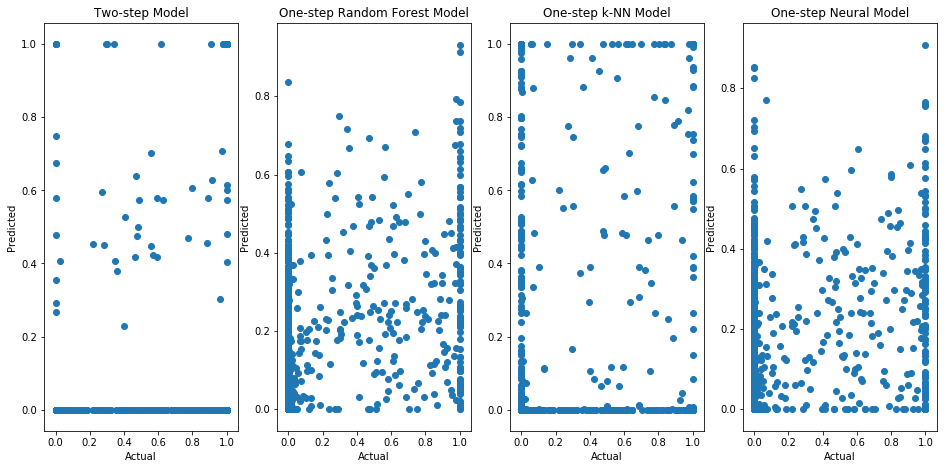

Mean Absolute Error (Two-step Model): 0.08 degrees.
Mean Arctan Absolute Percentage Error (Two-step Model):  0.13 %.
Mean Absolute Error (One-step Random Forest): 0.11 degrees.
Mean Arctan Absolute Percentage Error (One-step Random Forest):  1.42 %.
Mean Absolute Error (One-step k-NN): 0.11 degrees.
Mean Arctan Absolute Percentage Error (One-step k-NN):  0.29 %.
Mean Absolute Error (One-step Neural): 0.12 degrees.
Mean Arctan Absolute Percentage Error (One-step Neural):  0.93 %.


In [307]:
# Visuals and performance for one-step models

fig, ax3 = plt.subplots(1, 4, figsize = (16,7.5))
ax3[0].scatter(data['ELGD'][y_test.index], New_model_LGDs)
ax3[1].scatter(data['ELGD'][y_test.index], LGD_RF_predict)
ax3[2].scatter(data['ELGD'][y_test.index], LGD_KNN_predict)
ax3[3].scatter(data['ELGD'][y_test.index], LGD_MLPNN_predict)
ax3[0].set_xlabel(r'Actual')
ax3[0].set_ylabel(r'Predicted')
ax3[1].set_xlabel(r'Actual')
ax3[1].set_ylabel(r'Predicted')
ax3[2].set_xlabel(r'Actual')
ax3[2].set_ylabel(r'Predicted')
ax3[3].set_xlabel(r'Actual')
ax3[3].set_ylabel(r'Predicted')
ax3[0].set_title(r'Two-step Model')
ax3[1].set_title(r'One-step Random Forest Model')
ax3[2].set_title(r'One-step k-NN Model')
ax3[3].set_title(r'One-step Neural Model')
plt.show()

Overall_errors = abs(New_model_LGDs - data['ELGD'][y_test.index])
Overall_maape = np.mean(np.arctan(Overall_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (Two-step Model):', round(np.mean(Overall_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Two-step Model): ', round(Overall_maape,2), '%.')

One_step_rf_errors = abs(LGD_RF_predict - data['ELGD'][y_test.index])
One_step_rf_maape = np.mean(np.arctan(One_step_rf_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (One-step Random Forest):', round(np.mean(One_step_rf_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (One-step Random Forest): ', round(One_step_rf_maape,2), '%.')

One_step_knn_errors = abs(LGD_KNN_predict - data['ELGD'][y_test.index])
One_step_knn_maape = np.mean(np.arctan(One_step_knn_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (One-step k-NN):', round(np.mean(One_step_knn_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (One-step k-NN): ', round(One_step_knn_maape,2), '%.')

One_step_mlpnn_errors = abs(LGD_MLPNN_predict - data['ELGD'][y_test.index])
One_step_mlpnn_maape = np.mean(np.arctan(One_step_mlpnn_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (One-step Neural):', round(np.mean(One_step_mlpnn_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (One-step Neural): ', round(One_step_mlpnn_maape,2), '%.')

At this point, the two-step model that classifies first is still the top performing approach.

#### 4.4.5 Performance against simulations
There is one final benefit to the LGD simulator that I developed earlier. It can be used to benchmark the performance of the above models. We would expect the performance of a non-naive model to perform better than the random generator. We know the random generator does well on the aggregate, but not necessary at the individual loan level. Therefore, the (hopefully) better performance of our champion model should be due to it performing better at the individual loan level, as compared to random performance. Before we check the performance though, we need to replace the "0.01" from the simulations with "0" since we forced a minimum of 1% LGD in the simulation model to account for the discounted recovery cashflows.

In [362]:
Alt_LGDs = np.zeros(len(LGDs))

for i in range(len(LGDs)):
    if LGDs[i] == .01:
        Alt_LGDs[i] = 0
    else: Alt_LGDs[i] = LGDs[i]

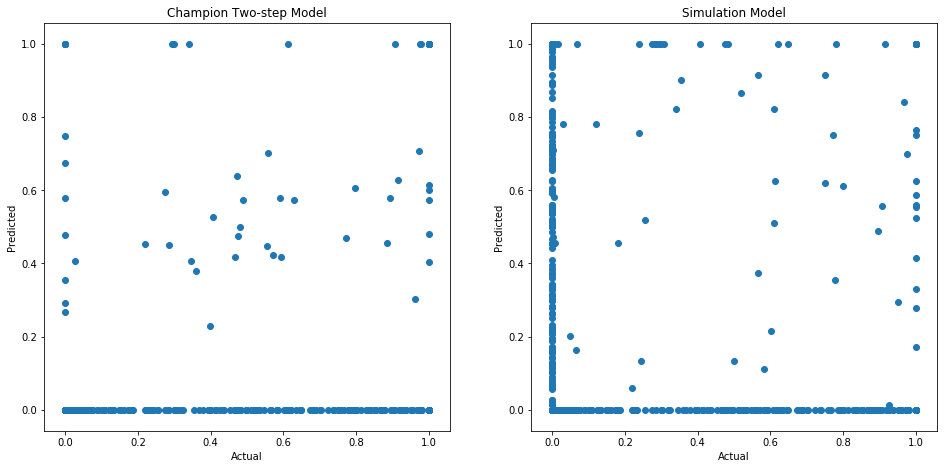

Mean Absolute Error (Two-step Model): 0.08 degrees.
Mean Arctan Absolute Percentage Error (Two-step Model):  0.13 %.
Mean Absolute Error (Simulation Model): 0.15 degrees.
Mean Arctan Absolute Percentage Error (Simulation Model):  0.28 %.


In [363]:
fig, ax4 = plt.subplots(1, 2, figsize = (16,7.5))
ax4[0].scatter(data['ELGD'][y_test.index], New_model_LGDs)
ax4[1].scatter(data['ELGD'][y_test.index], Alt_LGDs[y_test.index])
ax4[0].set_xlabel(r'Actual')
ax4[0].set_ylabel(r'Predicted')
ax4[1].set_xlabel(r'Actual')
ax4[1].set_ylabel(r'Predicted')
ax4[0].set_title(r'Champion Two-step Model')
ax4[1].set_title(r'Simulation Model')

plt.show()

print('Mean Absolute Error (Two-step Model):', round(np.mean(Overall_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Two-step Model): ', round(Overall_maape,2), '%.')

Random_errors = abs(Alt_LGDs[y_test.index] - data['ELGD'][y_test.index])
Random_maape = np.mean(np.arctan(Random_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (Simulation Model):', round(np.mean(Random_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Simulation Model): ', round(Random_maape,2), '%.')

Given the simulation model performs quite well - in fact pretty similar to our best performing one-step model - it is worth exploring further.

#### Simulation model as predictive model
I think it is worth taking the simulation model one step further to attempt it as a prediction model. Early I simply generated the same number of loans as our original data set, based on the same proportion of LTV groups. This meant that on the aggregate results would be appropriate, but did not guarantee loan-level accuracy. I will do the following to extend this approach to a predictive loan-level model:
* Run the simulations only on the test group of our prediction models
* Run many (i.e. 1000 or more) simulations per loan
* Take the average across the simulations for each loan

In [359]:
# Multiple simulation model - takes long time to run... only run if needed. Run sims = 5 if you just want to plat around with it.
sims = 1000
Sim_LGDs = np.zeros((len(y_test),sims))

for j in range(sims):

    for i in range(len(y_test)):
        if data.LTV_Group.eq('Above 1.45')[y_test.index].iloc[i]:
            if np.random.uniform(0,1,1) < Unsecured_threshold_low:
                Sim_LGDs[i][j] = 0
            elif np.random.uniform(0,1,1) > Unsecured_threshold_high:
                Sim_LGDs[i][j] = 1
            else: Sim_LGDs[i][j] = np.random.uniform(0,1,1)
        elif data.LTV_Group.eq('0.8 to 1.45')[y_test.index].iloc[i]:
            if np.random.uniform(0,1,1) < High_threshold_low:
                Sim_LGDs[i][j] = 0
            elif np.random.uniform(0,1,1) > High_threshold_high:
                Sim_LGDs[i][j] = 1
            else: Sim_LGDs[i][j] = np.random.uniform(0,1,1)
        elif data.LTV_Group.eq('0.5 to 0.8')[y_test.index].iloc[i]:
            if np.random.uniform(0,1,1) < Normal_threshold_low:
                Sim_LGDs[i][j] = 0
            elif np.random.uniform(0,1,1) > Normal_threshold_high:
                Sim_LGDs[i][j] = 1
            else: Sim_LGDs[i][j] = np.random.uniform(0,1,1)
        else:
            if np.random.uniform(0,1,1) < Low_threshold_low:
                Sim_LGDs[i][j] = 0
            elif np.random.uniform(0,1,1) > Low_threshold_high:
                Sim_LGDs[i][j] = 1
            else: Sim_LGDs[i][j] = np.random.uniform(0,1,1)

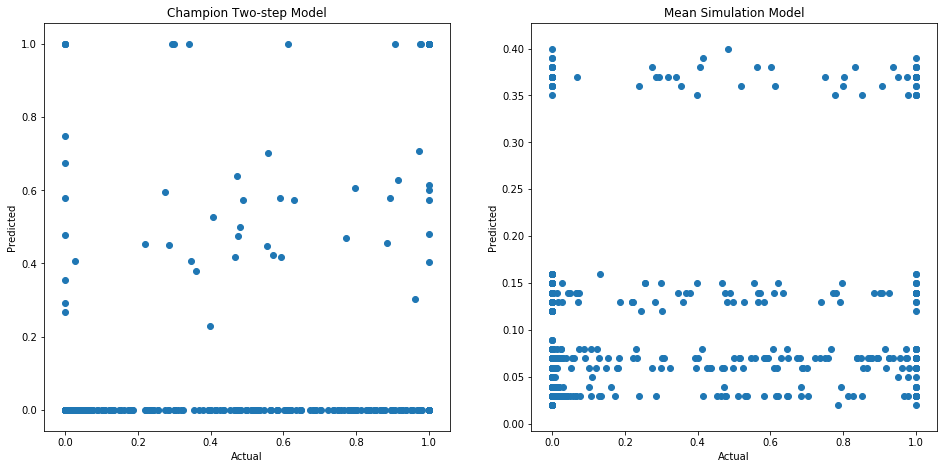

Mean Absolute Error (Two-step Model): 0.08 degrees.
Mean Arctan Absolute Percentage Error (Two-step Model):  0.13 %.
Mean Absolute Error (Mean Simulation Model): 0.13 degrees.
Mean Arctan Absolute Percentage Error (Mean Simulation Model):  1.44 %.


In [360]:
mean_sim_LGDs = np.mean(Sim_LGDs, axis=1)
mean_sim_LGDs = [round(x,2) for x in mean_sim_LGDs]

fig, ax5 = plt.subplots(1, 2, figsize = (16,7.5))
ax5[0].scatter(data['ELGD'][y_test.index], New_model_LGDs)
ax5[1].scatter(data['ELGD'][y_test.index], mean_sim_LGDs)
ax5[0].set_xlabel(r'Actual')
ax5[0].set_ylabel(r'Predicted')
ax5[1].set_xlabel(r'Actual')
ax5[1].set_ylabel(r'Predicted')
ax5[0].set_title(r'Champion Two-step Model')
ax5[1].set_title(r'Mean Simulation Model')

plt.show()

print('Mean Absolute Error (Two-step Model):', round(np.mean(Overall_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Two-step Model): ', round(Overall_maape,2), '%.')

Mean_Random_errors = abs(mean_sim_LGDs - data['ELGD'][y_test.index])
Mean_Random_maape = np.mean(np.arctan(Mean_Random_errors / (data['ELGD'][y_test.index] + EPSILON)))
print('Mean Absolute Error (Mean Simulation Model):', round(np.mean(Mean_Random_errors),2), 'degrees.')
print('Mean Arctan Absolute Percentage Error (Mean Simulation Model): ', round(Mean_Random_maape,2), '%.')


It turns out that running many simuations and averaging across for each loan, produces worse performance than a single simulation run. From the visual above (on the right), we can see that the predicted LGDs start to cluster is four ranges - 35% to 40%, ~12% to 16%, 5% to 10%, and ~2% to 5%. These are essentially probability weighted averages of the four different LTV groups used to generate the simulations. While these averages line-up roughly with what we expect, it differs more at the loan-level then previous models we have tested.

**Therefore, retain the "Champion Two-Step Model" as the best prediction model at the loan-level.**

<br/>

## 5. Outcomes
This section will discuss the conclusions of the analysis, summarize the impacts for my organization, and present next steps.

### 5.1 Conclusions
The key objective at the onset of this analysis was to see if more modern data science and machine learning techniques could be leverage to enhance my organizations LGD model within the Allowance for Credit Losses accounting process. The result is that an improved model (compared to the existing model in production) was developed using the following:

* A two-step model that uses a Random Forest algorithm to classify each loan into one of three classes: 0 - no losses, 1 - partial losses, and 2 - full loss, and then
* uses a Random Forest algorithm to regress a number between 0 and 1 for those classified as partial losses.

Comparing the existing model to the new model, there was an improvement to the Mean Squared Error (from 0.12 to 0.08) and to the Mean Arctan Absolute Percentage Error (from 1.42% to 0.13%).

A valuable output of the Random Forest algorithm is the feature importance. In both steps (i.e. the classification and regression step), the same five features were the top five most important: Risk Score, LTV, Exposure, Leverage, and Debt to Service Ratio. These features are appropriate from a business perspective and will resinate with management at my organization from a inuition standpoint. This will help with the buy-in and potential use of the model in production.

### 5.2 Impacts
A more accurate LGD model would allow the organization to calculate a more accurate level of allowance on its Financial Statements. It can also allow for more refined pricing of risk for our customers. 

However, to have this impact it would need further testing against updated data (not currently available), and it would need to be accepted by the organization's Model Governance Committee, by internal model users, and by the company's accountants and auditors. There is a lot involved to do this that is out of scope of this term project. That said, the results from this analysis will be used exactly as I anticipated at the onset, with an additional impact that was unanticipated:
* The "Challenger" model (i.e. the model in the conclusions section above) will be used to inform the next round of model development for the LGD model. It will also be used to challenge and benchmark the more traditional approaches that are currently used. This will allow time to familiarize some of these concepts with stakeholders and share results against models they are familiar with.
* The unanticipated impact / benefit is that the LGD simulation engine I designed will be used within a credit risk economic capital model used by the organization to understand extreme risk events. 

### 5.3 Next Steps
As mentioned in the previous section, there are many steps involved in moving this forward in an organization of this size and complexity. Below are a few of the key next steps:
* Work with the Model Development team to implement (and adjust as needed) the LGD simulation engine into the economic capital model.
* Work with IT and Finance to get updated loss data (from 2013 to 2019)
* Re-run the models including the more recent time series and check the performance again
* Incorporate the "Challenger" model into the Model Performance Monitoring process for the current LGD model to begin familiarizing stakeholders with the new model
* Explore enhancements to the Challenger model that bring in macro economic variables to make the model more "forward-looking"
* Once stakeholder "buy-in" of the newer techniques gets to a certain level, explore using the Challenger model in production
* Work with IT to determine best practices to deploying these types of models into production where strict audit trails and performance monitoring requirements exist

These steps are out of scope of this term project. However, the work done in this project is foundational to helping us move forward and has already produced valuable benefits.